In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import os 
import seaborn as sns 
sns.set_style("darkgrid")

%matplotlib inline 

In [2]:
root_dir  = os.path.abspath('.')
data_dir  = os.path.join(root_dir, 'data')
train     = os.path.join(data_dir,'car data.csv')

In [3]:
train_df = pd.read_csv(train)
train_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
train_df.shape

(301, 9)

In [5]:
# CATEGORICAL FEATURES 
#FUEL_TYPE, SELLER-TYPE,TRANSMISSION
print(train_df['Fuel_Type'].unique())
print(train_df['Seller_Type'].unique())
print(train_df['Transmission'].unique())
print(train_df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
#Missing and Null values
train_df.isnull().sum()/len(train_df)

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [7]:
train_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
train_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset = train_df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#Adding new feature
from datetime import datetime
now = datetime.now()
final_dataset['Current_Year'] = now.year
final_dataset['Current_Year'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Current_Year, dtype: int64

In [11]:
final_dataset['age_of_car'] = final_dataset['Current_Year'] - final_dataset['Year']


In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,age_of_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [13]:
#Since we have derived Age of the car, we can now drop the variables year and current_year. 
final_dataset.drop(columns=['Year','Current_Year'], axis=1, inplace=True)

In [14]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
age_of_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<Figure size 1080x720 with 0 Axes>

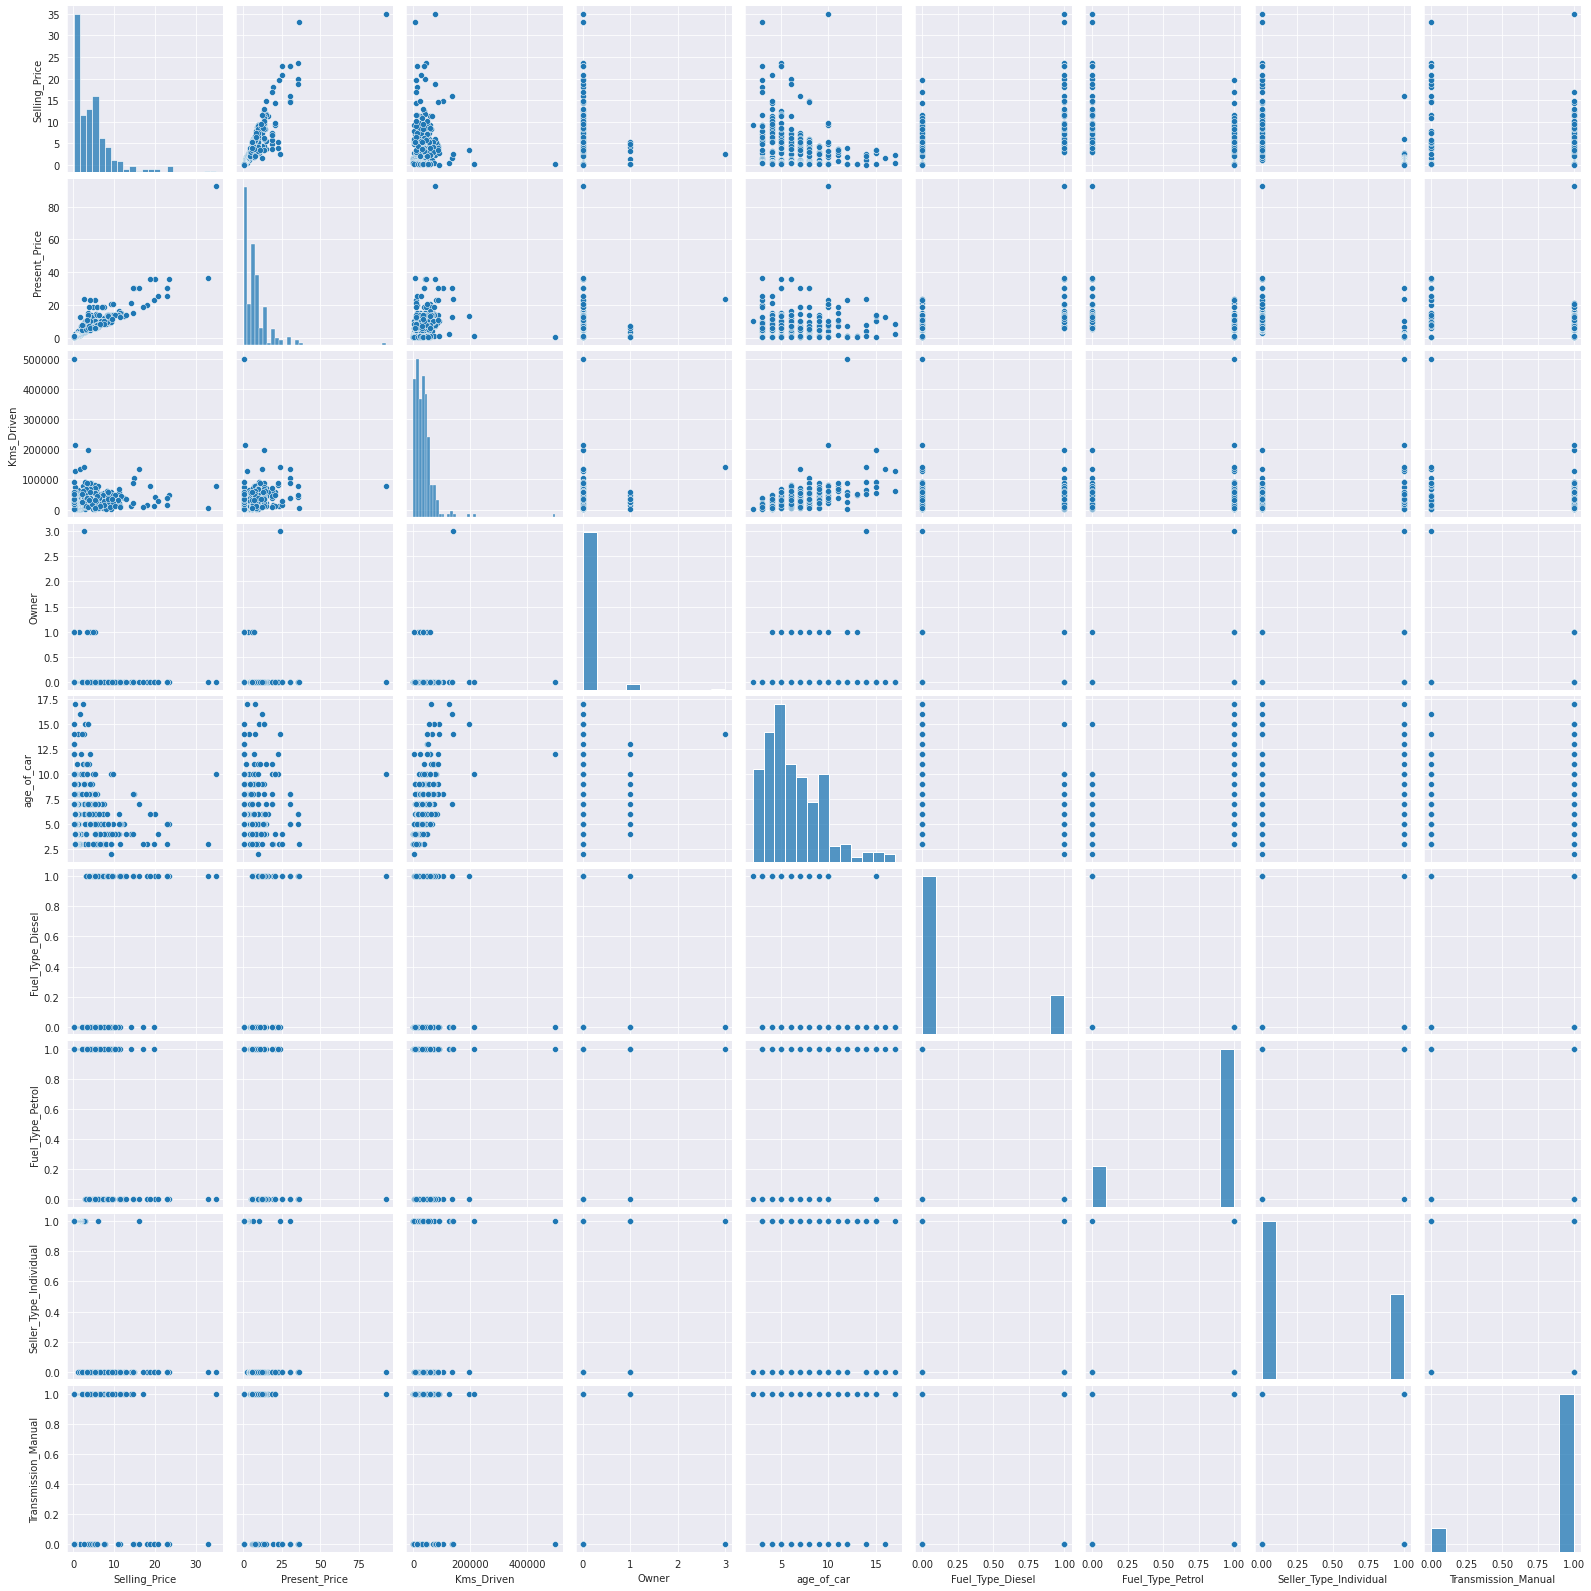

In [17]:
plt.figure(figsize=(15,10))
sns.pairplot(final_dataset)
plt.show()

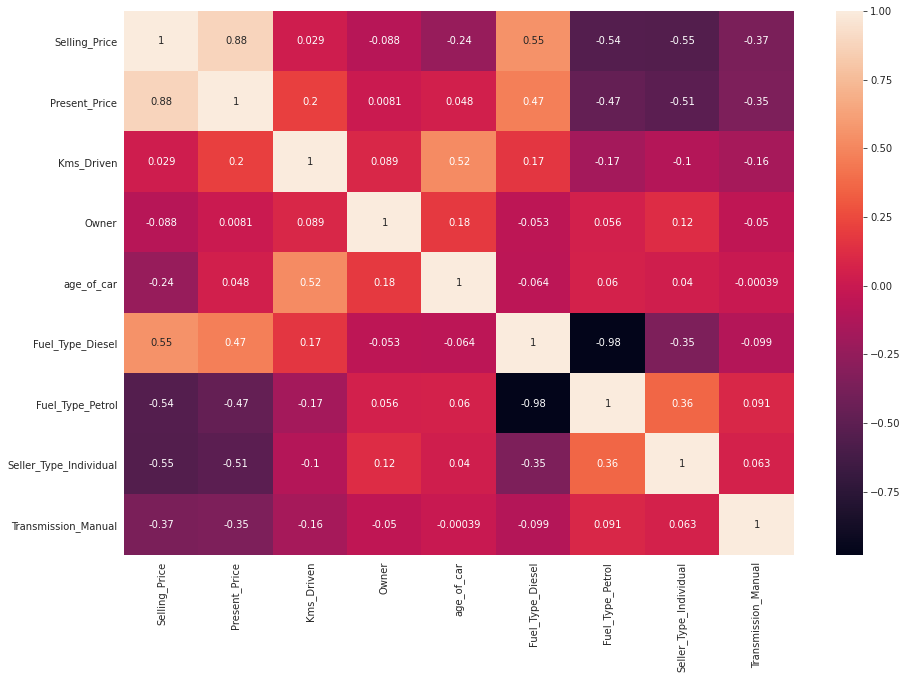

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(final_dataset.corr(), annot=True)
plt.show()

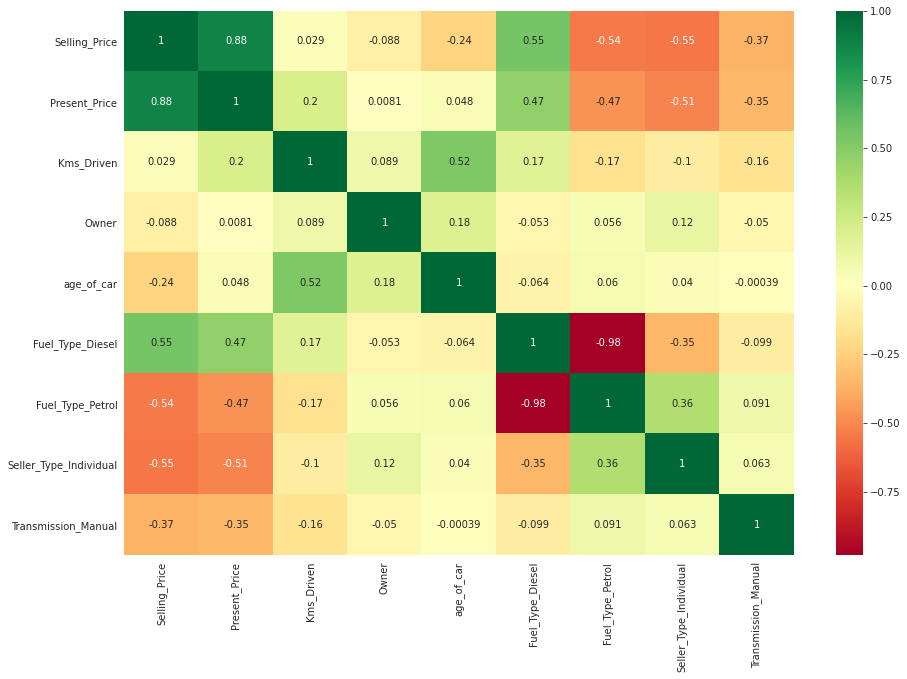

In [19]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.show()

### Dark red shows that the features are negatively correlated and dark green showns that the features are highly correlated.

In [20]:
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:,0]

In [21]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.36686121 0.04014198 0.00044764 0.07601165 0.23835418 0.00941642
 0.13284574 0.13592118]


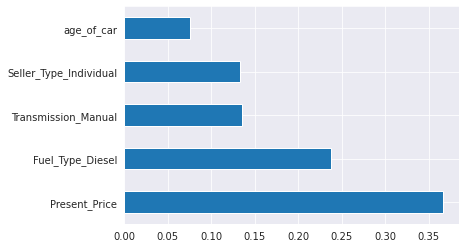

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size =.2, random_state = 42)

In [25]:
X_train.shape

(240, 8)

# CREATING A BASE MODEL 

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
###HYPERPARAMETERS
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [28]:
param_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
}
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
rf = RandomForestRegressor()

In [31]:
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=param_grid, 
                               scoring = 'neg_mean_squared_error',
                               n_iter=10,
                               cv=5,
                               random_state=42,
                               n_jobs=1,
                               verbose=1,
                              )

In [32]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [33]:
predictions = rf_random.predict(X_test)
predictions

array([ 0.79251,  9.99931,  5.16206,  0.31243,  6.83831,  6.3425 ,
        0.99445,  0.61587,  0.50262,  6.27045, 11.27608,  0.88023,
        7.37698,  0.68262,  5.3789 ,  2.961  ,  0.98938, 10.96958,
        0.66724,  1.44405,  0.55654,  8.81634,  6.0148 ,  2.73376,
        0.55166,  3.54675,  5.1674 ,  3.10595,  1.16881,  1.09139,
        0.70549,  9.62332,  0.43052,  2.65218,  8.00311,  4.1117 ,
        5.9437 ,  4.84003,  3.09573,  5.32356,  3.90832,  4.00641,
        4.84235,  0.55782,  7.04341,  0.56566,  7.02005,  6.09398,
        3.15862,  3.67683,  5.33025,  1.40924, 20.74994, 20.84757,
        6.77985,  8.72879,  5.1819 ,  9.66586,  2.61127,  7.23699,
        0.30303])

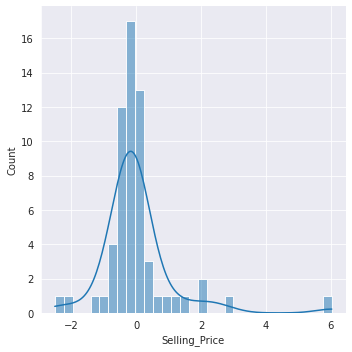

In [34]:
sns.displot(y_test-predictions,kde=True)

#### from  above the residual graph looks like a normal curve. this basically suggests that the model we created is a good model. 


/home/mia/pyenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


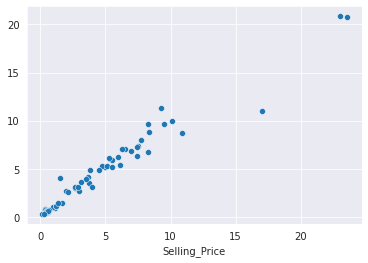

In [35]:
sns.scatterplot(y_test, predictions)
plt.show()

##### Even the scatter plot above is showing a linear pattern between y_test and predicted values. this also suggests that the values predicted by the model is good. 

In [36]:
# Saving the model for deployment. We Start pickling the file 
import pickle 
#open a file to store the model
pklFile = open('random_forest_regression_model.pkl','wb')

#dumping model information to the file
pickle.dump(rf_random, pklFile)